# Online Shoppers Purchasing Intention EDA


## Data description

Online Shoppers Purchasing Intention Dataset

The Revenue attribute can be used as the class label.

Administrative, Administrative Duration, Informational, Informational Duration, Product Related and Product Related Duration represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

The Bounce Rate, Exit Rate and Page Value features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of Bounce Rate feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The Page Value feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The Special Day feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

## Data load

https://drive.google.com/file/d/1AshdeEJ60IYbRjQP2u2jppnRCFi-5eeV/view?usp=sharing

In [3]:
! gdown --id 1AshdeEJ60IYbRjQP2u2jppnRCFi-5eeV

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1AshdeEJ60IYbRjQP2u2jppnRCFi-5eeV
To: /content/online+shoppers+purchasing+intention+dataset.zip
100% 1.07M/1.07M [00:00<00:00, 77.9MB/s]


In [4]:
! unzip /content/online+shoppers+purchasing+intention+dataset.zip

Archive:  /content/online+shoppers+purchasing+intention+dataset.zip
 extracting: online_shoppers_intention.csv  


## Data overview

In [5]:
# importing necessary libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# removing the limit on the number of columns
pd.set_option('display.max_columns', None)

# removing the restriction on the width of columns
pd.set_option('display.max_colwidth', None)

# ignore warnings
pd.set_option('chained_assignment', None)


In [7]:
#importing and looking at datasets
df=pd.read_csv('/content/online_shoppers_intention.csv')

In [8]:
# looking at dataset
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [9]:
# number of rows
df.shape

(12330, 18)

In [10]:
# looking at dataset values
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [11]:
# looking at number of nan elements
df.isna().mean().sort_values(ascending=False)

Administrative             0.0
Administrative_Duration    0.0
Weekend                    0.0
VisitorType                0.0
TrafficType                0.0
Region                     0.0
Browser                    0.0
OperatingSystems           0.0
Month                      0.0
SpecialDay                 0.0
PageValues                 0.0
ExitRates                  0.0
BounceRates                0.0
ProductRelated_Duration    0.0
ProductRelated             0.0
Informational_Duration     0.0
Informational              0.0
Revenue                    0.0
dtype: float64

In [12]:
#looking at types
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

**Conclusion**
- there are 18 columns and 12330 rows
- types are more or less coreect.
- there are no NaN in  the dataset.


## EDA and data wrangling

In [13]:
# function that will change names of columns to more correct type
import re
import pandas as pd

def convert_column_names(dataframe):
    converted_columns = {}
    for column in dataframe.columns:
        converted_name = re.sub(r'([a-z])([A-Z])', r'\1_\2', column)
        converted_name = converted_name.lower()
        converted_columns[column] = converted_name
    dataframe.rename(columns=converted_columns, inplace=True)

In [14]:
convert_column_names(df)

In [15]:
df.head(3)

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,special_day,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False


In [16]:
# transforming names of object columns to lower case
df.month=df.month.str.lower()
df.visitor_type=df.visitor_type.str.lower()

In [17]:
df.head(3)

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,special_day,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,feb,1,1,1,1,returning_visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,feb,2,2,1,2,returning_visitor,False,False
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,feb,4,1,9,3,returning_visitor,False,False


### Single-factor analysis : revenue.

In [18]:
# revenue
df.revenue.value_counts(dropna=False)

False    10422
True      1908
Name: revenue, dtype: int64

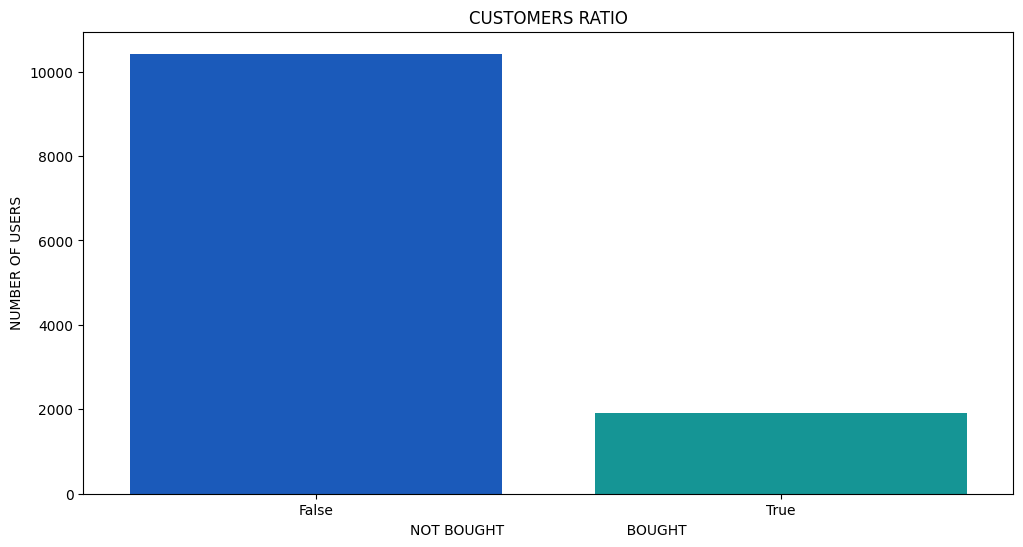

In [19]:
plt.figure(figsize=(12, 6))
ax=sns.countplot(x = 'revenue', data = df, palette='winter')

ax.set_title('CUSTOMERS RATIO')
ax.set_xlabel('NOT BOUGHT                            BOUGHT')
ax.set_ylabel('NUMBER OF USERS')
plt.show()

We have only 1908 success actions. Let's look if there are some dependences between the actions/ or with revenue.

#### Phik Criteria

I will use phik criteria.

In [20]:
! pip install phik

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 7.5 MB/s eta 0:00:00


In [21]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [22]:
phik_overview=df.phik_matrix()

interval columns not set, guessing: ['administrative', 'administrative_duration', 'informational', 'informational_duration', 'product_related', 'product_related_duration', 'bounce_rates', 'exit_rates', 'page_values', 'special_day', 'operating_systems', 'browser', 'region', 'traffic_type']


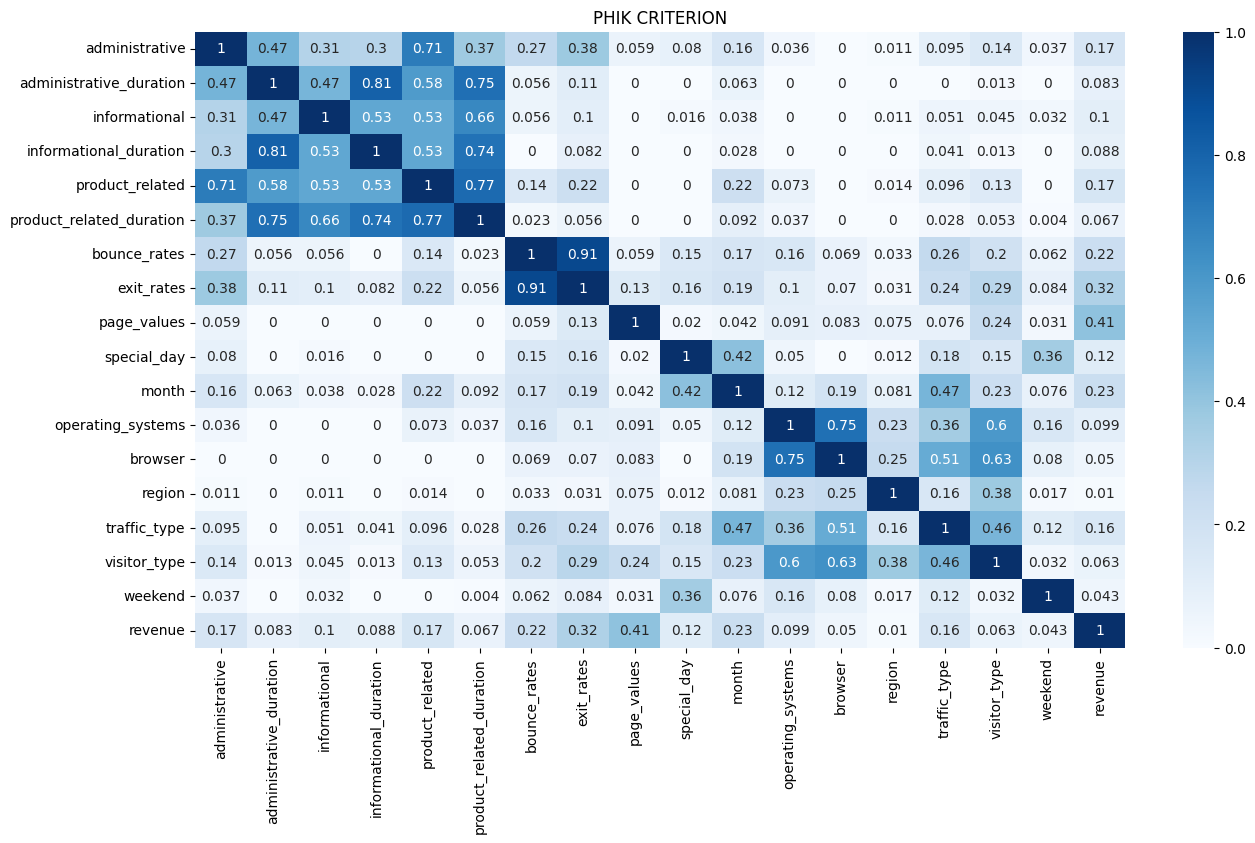

In [23]:
plt.figure(figsize=(15, 8))
ax=sns.heatmap(phik_overview, cmap="Blues", annot=True)
ax.set_title('PHIK CRITERION')
plt.show()

I can see that some data is showing some pairwise relationship. It is not good for machine learning models. Those paires are:


*   administrative - administrative_duration
*   informational - informational_duration
*   product_related - product_related_duration
*   operating_systems - browser
*   traffic_type - visitor_type
*   bounce_rates - exit_rates

I will drop them as by description of the dataset they are dependent on each other. But lets's check with other criterion.


In [24]:
# dropping pairwise dependandands
df=df.drop(['administrative','informational','product_related','operating_systems','traffic_type','bounce_rates'],axis=1)

#### ANOVA Criteria

In [25]:
########################################################
# f_oneway() function takes the group data as input and
# returns F-statistic and P-value

from scipy.stats import f_oneway

In [26]:
Data = []

for c1 in df.columns:
    for c2 in df.columns:
        if df[c1].dtype == 'object' and df[c2].dtype != 'object':
            CategoryGroupLists = df.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

,Category,Numerical,Is correlated
0,month,administrative_duration,Yes
1,month,informational_duration,Yes
2,month,product_related_duration,Yes
3,month,exit_rates,Yes
4,month,page_values,Yes
5,month,special_day,Yes
6,month,browser,Yes
7,month,region,Yes
8,month,weekend,Yes
9,month,revenue,Yes


#### Cramer criteria ($\chi^2$ )

In [27]:
!pip install association-metrics -q

  Preparing metadata (setup.py) ... done


In [28]:
df.dtypes

administrative_duration     float64
informational_duration      float64
product_related_duration    float64
exit_rates                  float64
page_values                 float64
special_day                 float64
month                        object
browser                       int64
region                        int64
visitor_type                 object
weekend                        bool
revenue                        bool
dtype: object

In [29]:
import association_metrics as am

df_cat = df.apply(lambda x: x.astype("category") if x.dtype == "object" or x.dtype == "int64" or x.dtype == "bool" else x)

cramersv = am.CramersV(df_cat)

cramersv.fit()

,month,browser,region,visitor_type,weekend,revenue
month,1.000000,0.070611,0.045676,0.140215,0.064103,0.176690
browser,0.070611,1.000000,0.129814,0.510842,0.088742,0.047411
region,0.045676,0.129814,1.000000,0.182158,0.030789,0.027394
visitor_type,0.140215,0.510842,0.182158,1.000000,0.055071,0.104735
weekend,0.064103,0.088742,0.030789,0.055071,1.000000,0.029295
revenue,0.176690,0.047411,0.027394,0.104735,0.029295,1.000000


Anova and Cramer criterion showed almost the same result as Phik criteria.

### Single-factor analysis : administrative duration.

In [30]:
df.administrative_duration.describe()

count    12330.000000
mean        80.818611
std        176.779107
min          0.000000
25%          0.000000
50%          7.500000
75%         93.256250
max       3398.750000
Name: administrative_duration, dtype: float64

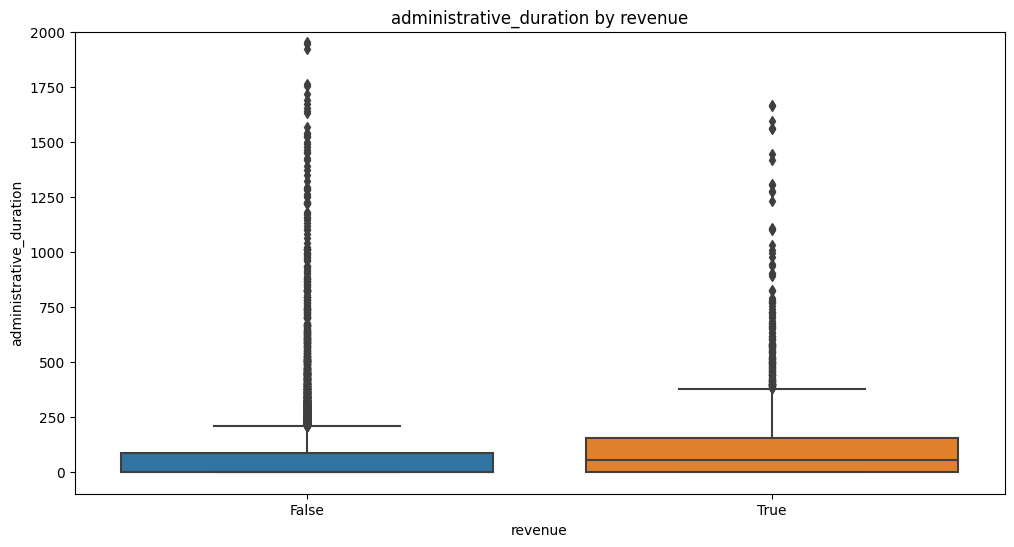

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='revenue', y='administrative_duration')
plt.title('administrative_duration by revenue')
plt.ylim(-100, 2000)
plt.show()

The dependence between revenue and administrative duration is unclear.

### Single-factor analysis : informational duration.



In [32]:
df.informational_duration.describe()

count    12330.000000
mean        34.472398
std        140.749294
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2549.375000
Name: informational_duration, dtype: float64

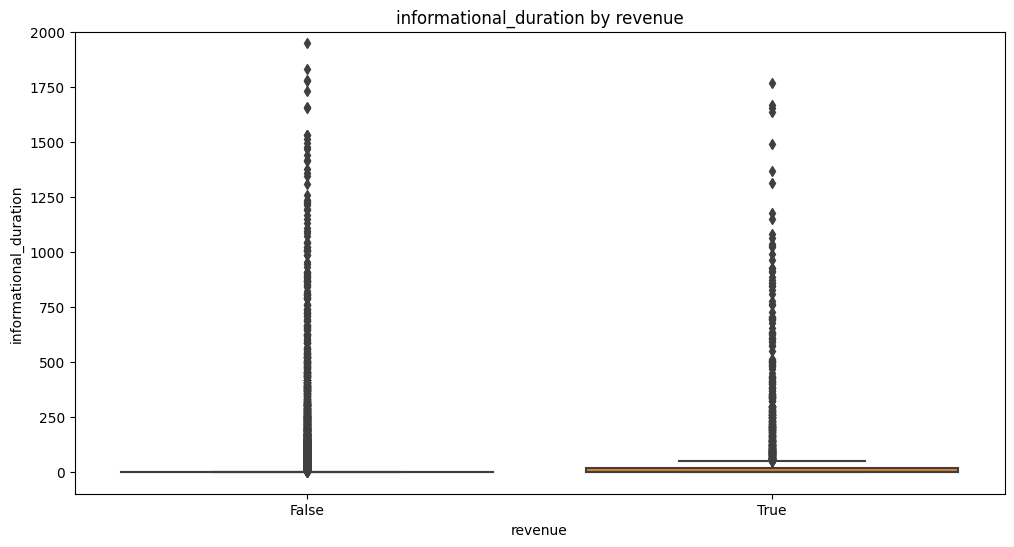

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='revenue', y='informational_duration')
plt.title('informational_duration by revenue')
plt.ylim(-100, 2000)
plt.show()

The dependence between revenue and informational duration is unclear.

### Single-factor analysis : product related duration.


In [34]:
df.product_related_duration.describe()

count    12330.000000
mean      1194.746220
std       1913.669288
min          0.000000
25%        184.137500
50%        598.936905
75%       1464.157214
max      63973.522230
Name: product_related_duration, dtype: float64

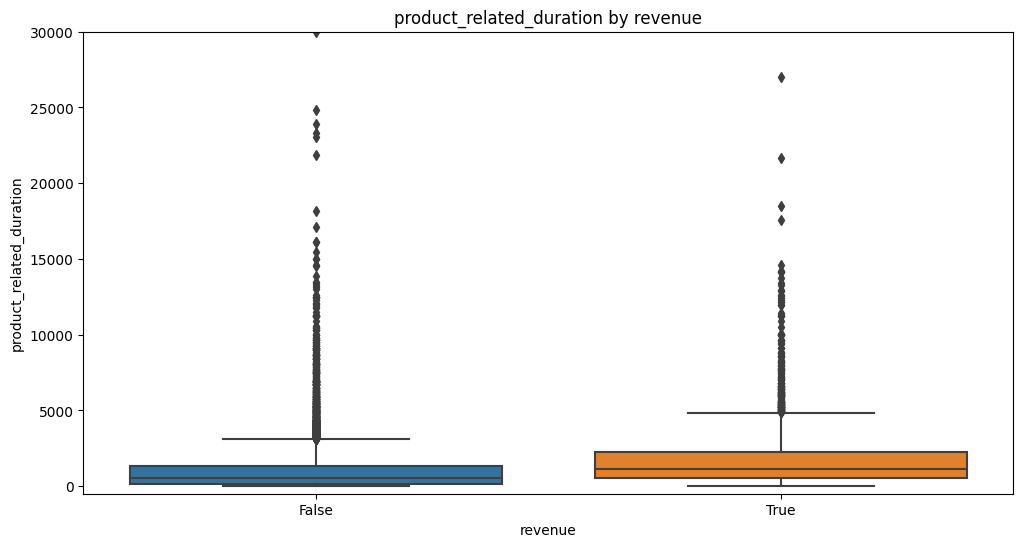

In [35]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='revenue', y='product_related_duration')
plt.title('product_related_duration by revenue')
plt.ylim(-500, 30000)
plt.show()

The dependence between revenue and informational duration seems to be present.

### Single-factor analysis : exit rates.

In [36]:
df.exit_rates.describe()

count    12330.000000
mean         0.043073
std          0.048597
min          0.000000
25%          0.014286
50%          0.025156
75%          0.050000
max          0.200000
Name: exit_rates, dtype: float64

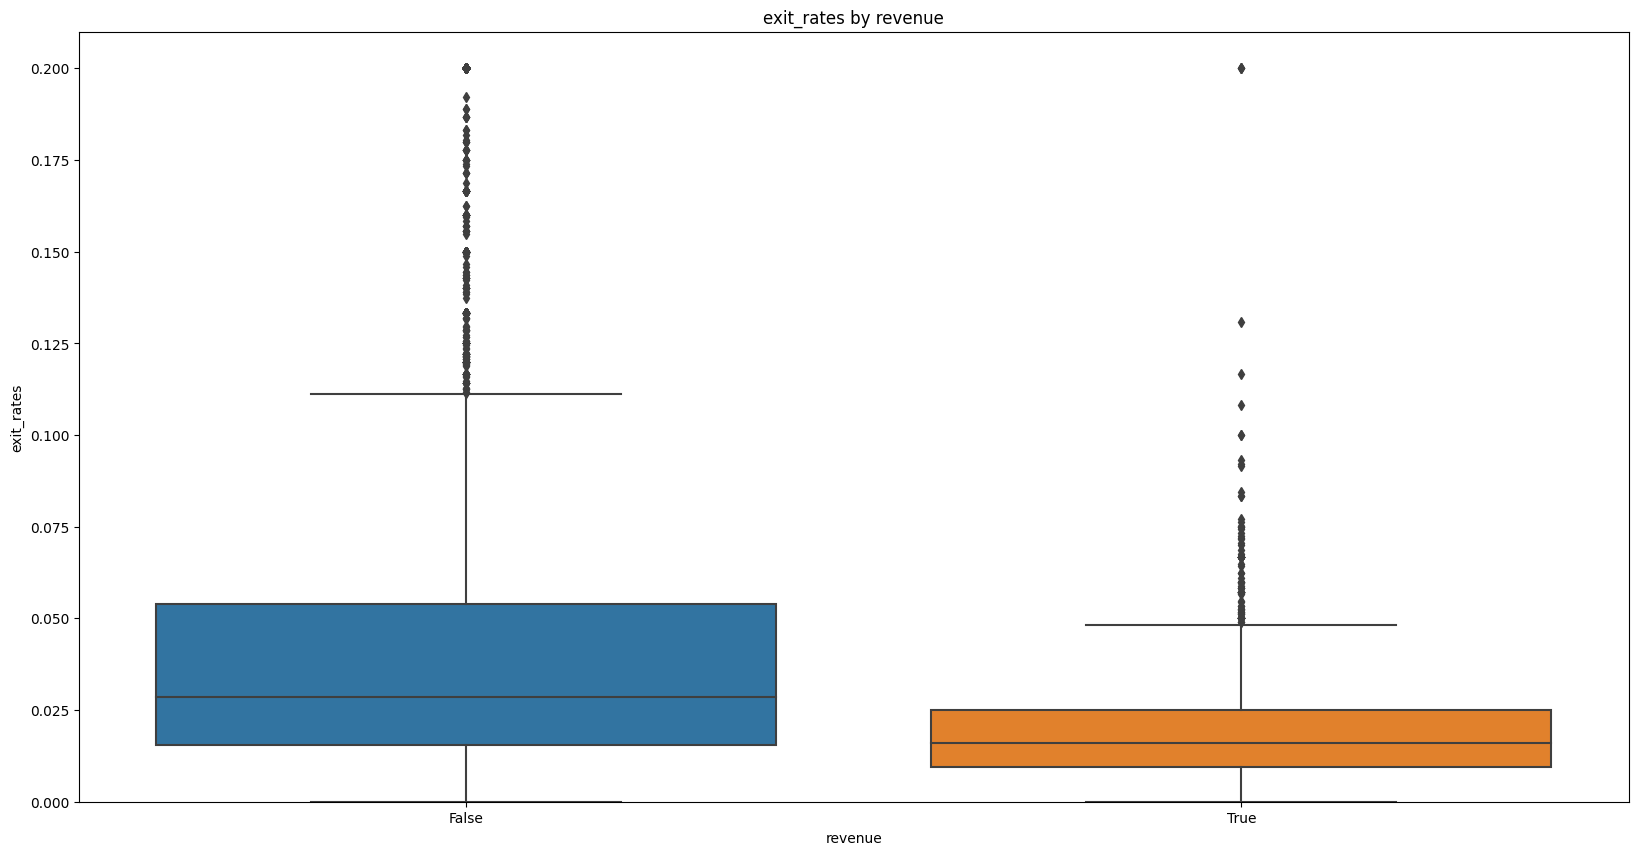

In [37]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='revenue', y='exit_rates')
plt.title('exit_rates by revenue')
plt.ylim(0,0.21)
plt.show()

The dependence between revenue and informational duration seems to be present.

### Single-factor analysis: page_values.

In [38]:
df.page_values.describe()

count    12330.000000
mean         5.889258
std         18.568437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: page_values, dtype: float64

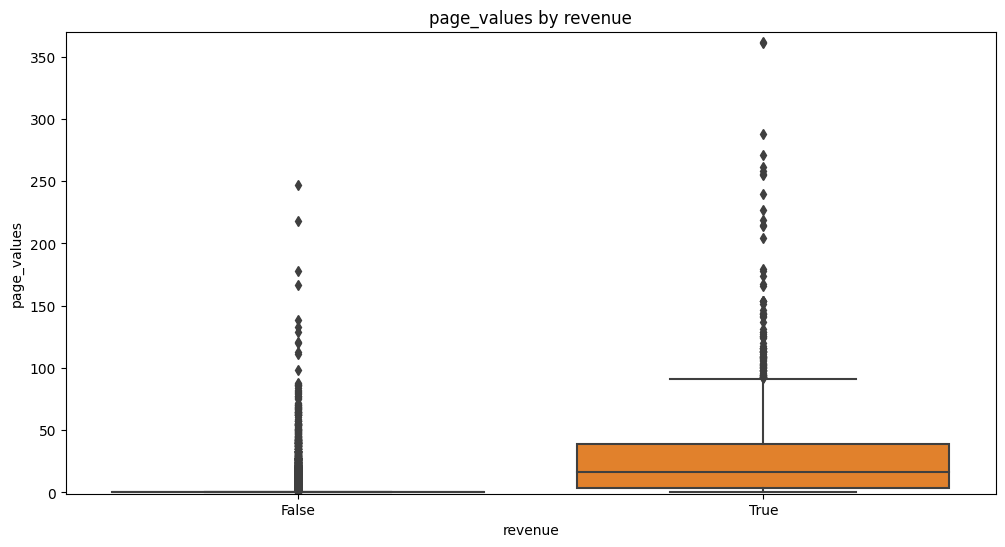

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='revenue', y='page_values')
plt.title('page_values by revenue')
plt.ylim(-1,370)
plt.show()

The dependence between revenue and informational duration seems to be present.

### Single-factor analysis : special day.

In [40]:
df.special_day.value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: special_day, dtype: int64

In [41]:
df.groupby('special_day',dropna=False)['revenue'].agg(['count','sum'])

,count,sum
special_day,,
0.0,11079,1831
0.2,178,14
0.4,243,13
0.6,351,29
0.8,325,11
1.0,154,10


There are not many values for special days, therfore I will unite them into one value.

In [42]:
def s_day(x):
  if x in [0.2,0.4,0.6,0.8,1.0]:
    return 1
  return 0

In [43]:
df['special_day']=df['special_day'].apply(s_day)

In [44]:
df.groupby('special_day',dropna=False)['revenue'].agg(['count','sum'])

,count,sum
special_day,,
0,11079,1831
1,1251,77


Dependence between special day and revenue is unclear.

### Single-factor analysis : month.

In [45]:
df.groupby('month',dropna=False)['revenue'].agg(['count','sum'])

,count,sum
month,,
aug,433,76
dec,1727,216
feb,184,3
jul,432,66
june,288,29
mar,1907,192
may,3364,365
nov,2998,760
oct,549,115


Dependence between month and revenue is unclear.

### Single-factor analysis : browser.

In [46]:
df.groupby('browser',dropna=False)['revenue'].agg(['count','sum'])

,count,sum
browser,,
1,2462,365
2,7961,1223
3,105,5
4,736,130
5,467,86
6,174,20
7,49,6
8,135,21
9,1,0


There seems to be 2 popular browsers and others.
I will combine them in one group.

In [47]:
def browser (x):
  if x in [1]:
    return 1
  if x in [2]:
    return 2
  return 3

In [48]:
df['browser']=df['browser'].apply(browser)

In [49]:
df.groupby('browser',dropna=False)['revenue'].agg(['count','sum'])

,count,sum
browser,,
1,2462,365
2,7961,1223
3,1907,320


In [50]:
df.head()

,administrative_duration,informational_duration,product_related_duration,exit_rates,page_values,special_day,month,browser,region,visitor_type,weekend,revenue
0,0.0,0.0,0.000000,0.20,0.0,0,feb,1,1,returning_visitor,False,False
1,0.0,0.0,64.000000,0.10,0.0,0,feb,2,1,returning_visitor,False,False
2,0.0,0.0,0.000000,0.20,0.0,0,feb,1,9,returning_visitor,False,False
3,0.0,0.0,2.666667,0.14,0.0,0,feb,2,2,returning_visitor,False,False
4,0.0,0.0,627.500000,0.05,0.0,0,feb,3,1,returning_visitor,True,False


Dependence between browser and revenue is unclear.

### Single-factor analysis : region.

In [51]:
df.groupby('region',dropna=False)['revenue'].agg(['count','sum']).sort_values(by='count', ascending=False)

,count,sum
region,,
1,4780,771
3,2403,349
4,1182,175
2,1136,188
6,805,112
7,761,119
9,511,86
8,434,56
5,318,52


In [52]:
df.head()

,administrative_duration,informational_duration,product_related_duration,exit_rates,page_values,special_day,month,browser,region,visitor_type,weekend,revenue
0,0.0,0.0,0.000000,0.20,0.0,0,feb,1,1,returning_visitor,False,False
1,0.0,0.0,64.000000,0.10,0.0,0,feb,2,1,returning_visitor,False,False
2,0.0,0.0,0.000000,0.20,0.0,0,feb,1,9,returning_visitor,False,False
3,0.0,0.0,2.666667,0.14,0.0,0,feb,2,2,returning_visitor,False,False
4,0.0,0.0,627.500000,0.05,0.0,0,feb,3,1,returning_visitor,True,False


Dependence between region and revenue is unclear.

### Single-factor analysis : visitor type.

In [53]:
df.groupby('visitor_type',dropna=False)['revenue'].agg(['count','sum'])

,count,sum
visitor_type,,
new_visitor,1694,422
other,85,16
returning_visitor,10551,1470


Dependence between visitor type and revenue is unclear.

### Single-factor analysis : weekend.

In [54]:
df.groupby('weekend',dropna=False)['revenue'].agg(['count','sum'])

,count,sum
weekend,,
False,9462,1409
True,2868,499


Dependence between weekend and revenue is unclear.

### GLM: Binomial regression - Bernulli Distribution.

As there are many unclear data I will make statistical analysis of the rest dataframe to understand if the target variable is really dependent on others and if there are significance.

In [55]:
df.head()

,administrative_duration,informational_duration,product_related_duration,exit_rates,page_values,special_day,month,browser,region,visitor_type,weekend,revenue
0,0.0,0.0,0.000000,0.20,0.0,0,feb,1,1,returning_visitor,False,False
1,0.0,0.0,64.000000,0.10,0.0,0,feb,2,1,returning_visitor,False,False
2,0.0,0.0,0.000000,0.20,0.0,0,feb,1,9,returning_visitor,False,False
3,0.0,0.0,2.666667,0.14,0.0,0,feb,2,2,returning_visitor,False,False
4,0.0,0.0,627.500000,0.05,0.0,0,feb,3,1,returning_visitor,True,False


In [56]:
import statsmodels.api as sm
import statsmodels.formula.api as sf

The type of distribution is Bernoulli.

In [57]:
logit_res = sf.glm('revenue ~ administrative_duration+ informational_duration+\
            product_related_duration+exit_rates+page_values+C(special_day) + C(browser) + C(region)+C(visitor_type)+C(weekend)',\
                   df, family = sm.families.Binomial()).fit()

In [58]:
logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                          
===============================================================================================
Dep. Variable:     ['revenue[False]', 'revenue[True]']   No. Observations:                12330
Model:                                             GLM   Df Residuals:                    12310
Model Family:                                 Binomial   Df Model:                           19
Link Function:                                   Logit   Scale:                          1.0000
Method:                                           IRLS   Log-Likelihood:                -3701.5
Date:                                 Fri, 28 Jul 2023   Deviance:                       7403.0
Time:                                         14:23:18   Pearson chi2:                 1.10e+08
No. Iterations:                                      7   Pseudo R-squ. (CS):             0.2299
Covariance Type:                             nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                1.7100      0.111     15.458      0.000       1.493       1.927
C(special_day)[T.1]                      0.6075      0.137      4.450      0.000       0.340       0.875
C(browser)[T.2]                          0.0389      0.080      0.485      0.628      -0.118       0.196
C(browser)[T.3]                         -0.0396      0.105     -0.378      0.706      -0.245       0.166
C(region)[T.2]                          -0.0729      0.108     -0.674      0.500      -0.285       0.139
C(region)[T.3]                           0.0458      0.085      0.540      0.589      -0.120       0.212
C(region)[T.4]                           0.0934      0.112      0.831      0.406      -0.127       0.314
C(region)[T.5]                           0.2776      0.207      1.343      0.179      -0.128       0.683
C(region)[T.6]                           0.0353      0.130      0.270      0.787      -0.220       0.291
C(region)[T.7]                           0.0515      0.132      0.389      0.697      -0.208       0.311
C(region)[T.8]                           0.0495      0.171      0.290      0.772      -0.285       0.384
C(region)[T.9]                           0.1514      0.168      0.901      0.368      -0.178       0.481
C(visitor_type)[T.other]                 0.6366      0.532      1.197      0.231      -0.406       1.679
C(visitor_type)[T.returning_visitor]     0.3232      0.084      3.847      0.000       0.159       0.488
C(weekend)[T.True]                      -0.1200      0.070     -1.712      0.087      -0.257       0.017
administrative_duration                  0.0001      0.000      0.789      0.430      -0.000       0.000
informational_duration                  -0.0002      0.000     -0.844      0.399      -0.001       0.000
product_related_duration                -0.0001   1.46e-05     -9.661      0.000      -0.000      -0.000
exit_rates                              17.6908      1.617     10.940      0.000      14.522      20.860
page_values                             -0.0797      0.002    -34.133      0.000      -0.084      -0.075
========================================================================================================
"""

I define p-value = 0.05 as  standart level of statistatistical significance. I exclude columns with p-value more than that level.

In [59]:
logit_res = sf.glm('revenue ~ \
            product_related_duration+exit_rates+page_values+C(special_day)',\
                   df, family = sm.families.Binomial()).fit()

In [60]:
logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                          
===============================================================================================
Dep. Variable:     ['revenue[False]', 'revenue[True]']   No. Observations:                12330
Model:                                             GLM   Df Residuals:                    12325
Model Family:                                 Binomial   Df Model:                            4
Link Function:                                   Logit   Scale:                          1.0000
Method:                                           IRLS   Log-Likelihood:                -3713.9
Date:                                 Fri, 28 Jul 2023   Deviance:                       7427.9
Time:                                         14:24:43   Pearson chi2:                 8.25e+07
No. Iterations:                                      7   Pseudo R-squ. (CS):             0.2284
Covariance Type:                             nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.9502      0.060     32.324      0.000       1.832       2.068
C(special_day)[T.1]          0.6355      0.136      4.687      0.000       0.370       0.901
product_related_duration    -0.0001   1.31e-05     -9.893      0.000      -0.000      -0.000
exit_rates                  19.0590      1.604     11.879      0.000      15.914      22.204
page_values                 -0.0793      0.002    -34.325      0.000      -0.084      -0.075
============================================================================================
"""

Factors that influence revenue are : special_day, product_related_duration, exit_rates and page_values.
It does not mean that other factors does not influence. It is possible that I got such results due to lack of data. It is also possible that the factor does not influence, for example administrative_duration - probably it is just some registration page.

### Polars to Pandas comaprison.

I will compare time that polars libary and pandas libary use to proccess large datasets.

In [61]:
# creating large dataset

In [62]:
df_big = df.copy()

for i in range(200):
  df_big = pd.concat([df_big, df])

df_big.to_csv("df_big.csv", index=False)

In [ ]:
# checking the size
df_big.shape

(2478330, 12)

In [63]:
!pip install polars

import polars as pl

print(pl.__version__)

0.17.3


Comparing time of reading the large file.

In [64]:
%%time

df_pl = pl.read_csv("df_big.csv")

CPU times: user 2.19 s, sys: 1.04 s, total: 3.23 s
Wall time: 3.11 s


In [65]:
%%time

df_pd=pd.read_csv("df_big.csv")

CPU times: user 3.67 s, sys: 168 ms, total: 3.84 s
Wall time: 3.89 s


Comparing the aggregation time.

In [66]:
%%time
df_pl.select(pl.col(['exit_rates', 'page_values']))

CPU times: user 2.96 ms, sys: 1 ms, total: 3.96 ms
Wall time: 39.9 ms


exit_rates,page_values
f64,f64
0.2,0.0
0.1,0.0
0.2,0.0
0.14,0.0
0.05,0.0
0.024561,0.0
0.2,0.0
0.2,0.0
0.1,0.0


In [67]:
%%time

df_pd[['exit_rates', 'page_values']]

CPU times: user 13.9 ms, sys: 0 ns, total: 13.9 ms
Wall time: 17.3 ms


,exit_rates,page_values
0,0.200000,0.000000
1,0.100000,0.000000
2,0.200000,0.000000
3,0.140000,0.000000
4,0.050000,0.000000
...,...,...
2478325,0.029031,12.241717
2478326,0.021333,0.000000
2478327,0.086667,0.000000
2478328,0.021053,0.000000


## EDA Conclusion

Target value is represented by Bernoulli destribution and data is limited. Therefore following issues may arise during the machine learning process:

1. Class imbalance: When one class dominates the data, the model may encounter class imbalance issues. For example, if 99% of the examples belong to class 0, and only 1% belong to class 1, the model may tend to predict class 0 without properly considering class 1. This can lead to poor classification of the minority class and an underestimation of its importance.

2. Insufficient class separability: If the classes are not well separable in the feature space, the model may struggle to build an effective separator. This can result in poor classification performance and low model accuracy.

3. Probability estimation errors: Models based on binary target variables predict probabilities of belonging to each class. However, if the model is not flexible enough or lacks sufficient data, the probability estimates may be inaccurate. For instance, the model may predict probabilities close to 0 or 1, while the true probabilities lie somewhere in between. This can be problematic, especially when the model's results are used for decision-making based on probabilistic estimates.

4. Overfitting: The model may suffer from overfitting, especially when the amount of data is limited. With a small number of training examples for each class, the model may learn incorrect patterns or become sensitive to outliers.

To address these issues, various approaches can be applied, such as collecting additional data, data augmentation, class weight adjustments, changing the classification threshold, or using algorithms specifically designed to handle imbalanced data, such as algorithms with class-weighted learning or using metrics that account for class imbalance (e.g., precision-recall).